In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import os
# switch to the appropriate directory for running the code
if os.getcwd()[-16:] != 'debiased-vb-mlmc':
    os.chdir("../")
    assert os.getcwd()[-16:] == 'debiased-vb-mlmc'

In [3]:
dirs = os.listdir("./out/LDA")
dirs

['p_trained_by_LMELBO64',
 'p_trained_by_ELBO',
 'dLMELBO_convergence.csv',
 '.ipynb_checkpoints']

In [4]:
def plot_logs(logs):
    x = np.arange(1,101)*100
    metrices = ['per_word_ELBO', 'per_word_LMELBO1', 'per_word_LMELBO4', 'per_word_LMELBO16', 'per_word_LMELBO64']
    ys = logs_lmelbo[metrices].values
    ys = ys[:10000].reshape([-1,100, 5]).mean(axis=1)

    cm = plt.get_cmap('viridis').colors
    cs = ['C1', cm[225], cm[175], cm[125],cm[75]]

    for c,y in zip(cs, ys.T):
        plt.plot(x,y, c=c)

    plt.legend(['ELBO','LMELBO (n_MC=1)','LMELBO (n_MC=4)','LMELBO (n_MC=16)','LMELBO (n_MC=64)'])
    plt.xlabel('the number of iterations')
    plt.ylabel('per word values of metrices')

In [5]:
dir_name = dirs[0]
logs_lmelbo = pd.read_csv("./out/LDA/{}/logs.csv".format(dir_name), index_col=0)

In [6]:
dir_name = dirs[1]
logs_elbo = pd.read_csv("./out/LDA/{}/logs.csv".format(dir_name), index_col=0)

Text(0.5, 1.0, 'trained p using LMELBO')

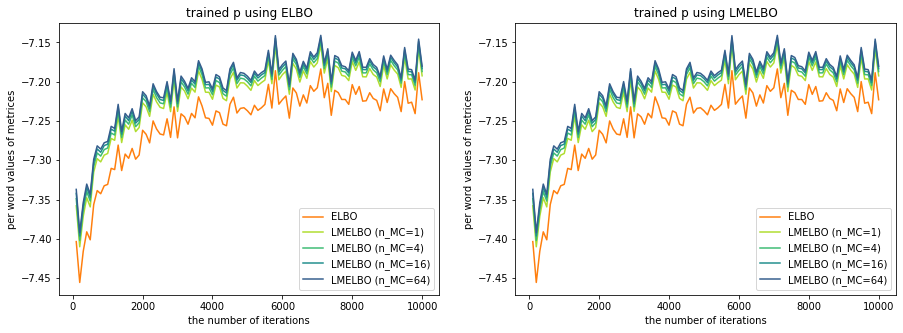

In [13]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plot_logs(logs_elbo)
plt.title("trained p using ELBO")
plt.subplot(1,2,2)
plot_logs(logs_lmelbo)
plt.title("trained p using LMELBO")

# Unfortunately, from the above experiment, training p using LMELBO was worse than doing so using ELBO.

In [12]:
logs_elbo["per_word_LMELBO64"].mean(),\
logs_lmelbo["per_word_LMELBO64"].mean()

(-7.195671443842459, -7.204494423660571)

In [8]:
logs_elbo.iloc[8000:8003]

,per_word_ELBO,per_word_LMELBO1,per_word_LMELBO4,per_word_LMELBO16,per_word_LMELBO64,alpha,eta
8000,-7.229628,-7.196689,-7.187700,-7.183810,-7.178565,0.059043,0.024840
8001,-7.372989,-7.344502,-7.337481,-7.335234,-7.332912,0.059008,0.024838
8002,-7.236861,-7.202349,-7.199474,-7.192915,-7.189523,0.058935,0.024837


In [9]:
logs_lmelbo.iloc[8000:8003]

,per_word_ELBO,per_word_LMELBO1,alpha,eta,per_word_LMELBO4,per_word_LMELBO16,per_word_LMELBO64
8000,-7.254033,-7.219248,0.073730,0.023671,-7.212567,-7.204806,-7.203242
8001,-7.386425,-7.354519,0.073917,0.023669,-7.352787,-7.346759,-7.340357
8002,-7.210486,-7.174958,0.073671,0.023667,-7.167713,-7.161832,-7.159952
